<a href="https://www.kaggle.com/code/muhammadmeftahmafazy/skripsi-meftah?scriptVersionId=127511174" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mengimpor *Library*

In [10]:
# feature extractoring and preprocessing data
import librosa
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,scale
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold, StratifiedKFold, cross_val_predict 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc, plot_roc_curve
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

#Pytorch
import torch

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Other
from IPython.display import Audio
from tqdm import tqdm

In [ ]:
!ls ../input/coughvid-19/dataset/archive_wav/archive_wav

In [ ]:
dataset = "../input/coughvid-19/dataset/metadata_wav.csv"
train_csv = pd.read_csv(dataset, index_col=0)
train_csv

# Konversi Audio menjadi Spektrogram

In [ ]:
cmap = plt.get_cmap('inferno')
tot_rows = train_csv.shape[0]
print ('total_rows',tot_rows, 'columns: ', train_csv.shape[1])
for i in range(0,1): #Thay range(1) = range(tot_rows)
    source = train_csv.iloc[6]["file"]
    filename = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
    y,sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB');
    #plt.axis('off');
    plt.savefig(f'./{source[:-3].replace(".", "")}.png')
    print (source[:-4]) #Remove the last 4 characters ".wav"
    #plt.clf() 

# Ekstraksi Fitur

## Ekstraksi fitur saat ini terdapat 6 ekstraksi yang nantinya kemungkinan akan bertambah :

*     Chroma Short Time Fourier Transform (STFT)
*     Spectral Centroid
*     Spectral Bandwidth
*     Spectral Rolloff
*     Zero Crossing Rate
*     Mel Frequency Cepstral Coefficient (MFCC)

In [ ]:
# #Membuat Header
# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for i in range(1, 11):
#     header += f' mfcc{i}'
# header += ' label'
# header = header.split()
# print(header)

In [ ]:
# #Proses Ekstraksi Fitur
# file = open('data_new_extended.csv', 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# # data_new_extended = pd.read_csv('./data_new_extended.csv')
# #print ('data_new_extended\n',data_new_extended)
# for i in tqdm(range(train_csv.shape[0])):
#         source = train_csv.iloc[i]["file"]
# #         print ('source',source)
#         file_name = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
#         label =  train_csv.iloc[i]["status"]
# #         print ('\status', label)
#         y,sr = librosa.load(file_name, mono=True, duration=5)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
# #         chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
# #         chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
# #         chroma_vqt = librosa.feature.chroma_vqt(y=y, sr=sr, intervals=[])
# #         mel_spectro = librosa.feature.melspectrogram(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,hop_length=1024)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,hop_length=1024)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=1024) #Nên có hop-length
#         #print ('spec_cent',spec_cent, 'shape:',spec_cent.shape)
#         #print ('spec_bw',spec_bw, 'shape:',spec_bw.shape)
#         #print ('rolloff',rolloff, 'shape:',rolloff.shape)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
#         #print ('mfcc',mfcc)
        
# # mendapatkan nilai rata rata, perlu dimasukkan ke var to_append {np.mean(chroma_cqt)} {np.mean(chroma_vqt)} {np.mean(chroma_cens)} {np.mean(mel_spectro)}
#         to_append = f'{np.mean(chroma_stft)}  {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#         #np.mean nilai rata-rata
#         librosa.display.specshow(mfcc, x_axis='time') #Show MFCC
#         plt.title('MFCC')
#         #plt.show()
        
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
#         to_append += f' {label}'
#         value = [str(source)]
#         value.extend(to_append.split())
#         file = open('./data_new_extended.csv', 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(value)

# Mengunduh Data *CSV*

In [ ]:
# Downloading the received file
from IPython.display import HTML
import pandas as pd
import numpy as np

def create_download_link(title = "Download CSV file", filename = "./data_new_extended.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='./data_new_extended.csv')

# Inisial Dataset

In [5]:
#Panggil Dataset
data = pd.read_csv("../input/coughvid-19/dataset/data_mfcc10.csv")

In [6]:
#Menghapus kolom nama file
data_new = data.drop('filename', axis=1)

In [7]:
#Mengubah label menjadi numerik
data_new['label'].replace(['healthy', 'COVID-19'], [0,1], inplace=True)

In [8]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel. 
# array ke-16 untuk dataset 10 mfcc
# array ke-26 untuk dataset 20 mfcc
# array ke-36 untuk dataset 30 mfcc
X = data_new[data_new.columns[:16]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = data_new['label']

# Klasifikasi menggunakan *SVM* dengan Splitting Data (Opsional)

In [ ]:
# # standarisasi nilai-nilai dari dataset
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# # memisahkan data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # membuat objek SVC dan memanggil fungsi fit untuk melatih model
# clf = SVC(probability=True)
# clf.fit(X_train, y_train)

# # Menampilkan skor akurasi prediksi
# clf.score(X_test, y_test)

# # Memprediksi probabilitas hasil klasifikasi pada data testing
# y_prob = clf.predict_proba(X_test)[:, 1]

# # Memprediksi label kelas pada data testing
# y_pred = clf.predict(X_test)

# # Menampilkan skor akurasi dan AUC
# print('Accuracy Score:', clf.score(X_test, y_test))
# print('AUC Score:', roc_auc_score(y_test, y_prob))
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Klasifikasi menggunakan *SVM* dengan K-Fold Cross Validation

In [ ]:
# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()

results=[]

# Inisialisasi objek SVM
pipe = SVC(kernel='rbf',  C=0.1, gamma='scale', probability=True)
# pipe = SVC(kernel='poly',  C=1.0, gamma='scale', probability=True)
# pipe = SVC(kernel='linear',  C=1.0, gamma='scale', probability=True)
# pipe = SVC(kernel='sigmoid',  C=1.0, gamma='scale', probability=True)

# Loop untuk setiap fold
for train_index, test_index in skf.split(X, y):
    
    # Memisahkan data untuk training dan testing
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Melakukan training pada model SVM
    pipe.fit(X_train, y_train)
    
    # Melakukan prediksi pada data testing
    y_pred = pipe.predict(X_test)
    
    # Hitung Probabilitas
    y_prob = pipe.decision_function(X_test)
    
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
     
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
    
#     print(classification_report(y_test, y_pred))
    plot_roc_curve(pipe, X_test, y_test)
    plt.show()
    
    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob)
    
     # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

# Klasifikasi menggunakan *SVM* dengan K-Fold Cross Validation dan Random Under Sampling

In [ ]:
# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inisial Under Sampling
rus = RandomUnderSampler(random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()

results=[]

# Inisialisasi objek SVM
pipe = SVC(kernel='rbf',  C=0.1, gamma='auto', probability=True)
# pipe = SVC(kernel='poly',  C=1.0, gamma='auto', probability=True)
# pipe = SVC(kernel='linear',  C=0.2, gamma='auto', probability=True)
# pipe = SVC(kernel='sigmoid',  C=0.2, gamma='auto', probability=True)

# Loop untuk setiap fold
for train_index, test_index in skf.split(X, y):
    
    # Memisahkan data untuk training dan testing
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Melakukan undersampling pada data training
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

    X_train_res = scaler.fit_transform(X_train_res)
    X_test = scaler.transform(X_test)
    
    # Melakukan training pada model SVM
    pipe.fit(X_train_res, y_train_res)
    
    # Melakukan prediksi pada data testing
    y_pred = pipe.predict(X_test)
    
    # Hitung Probabilitas
    y_prob = pipe.decision_function(X_test)
    
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    # print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

    # print(classification_report(y_test, y_pred))
    plot_roc_curve(pipe, X_test, y_test)
    plt.show()

    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob)

    # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})

    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

# Klasifikasi menggunakan *SVM* dengan K-Fold Cross Validation dan SMOTE

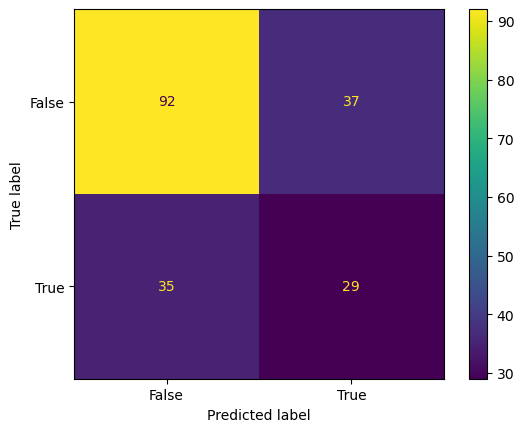

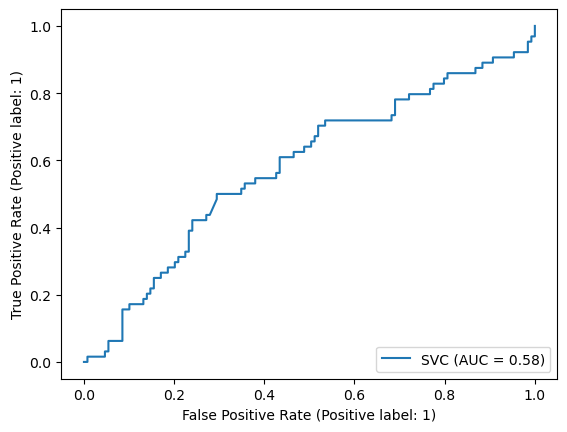

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063


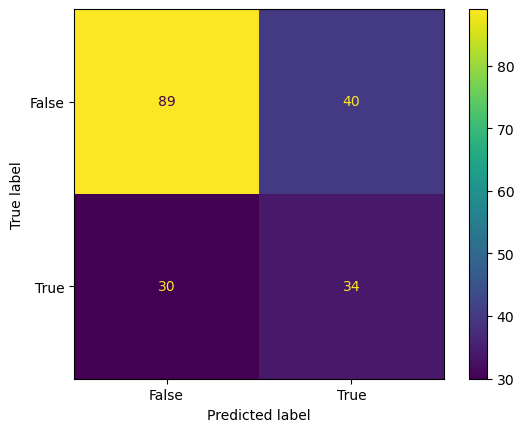

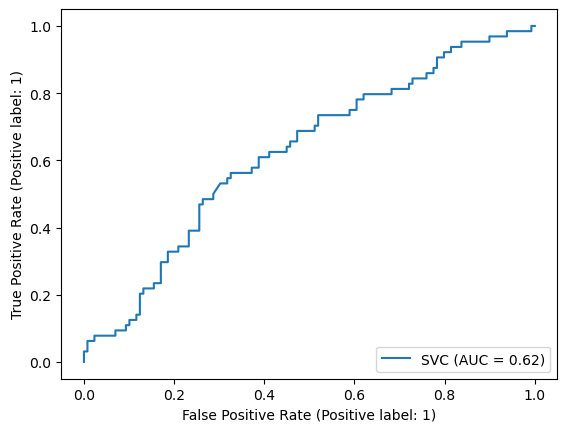

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183


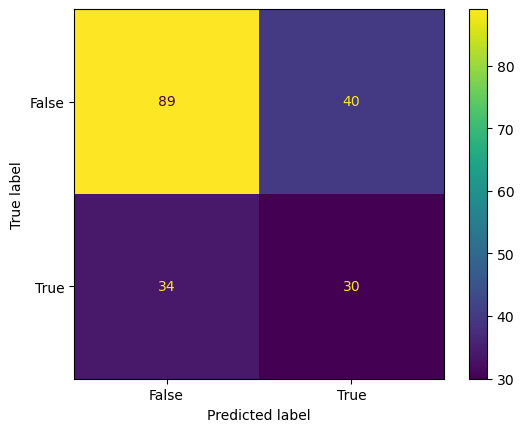

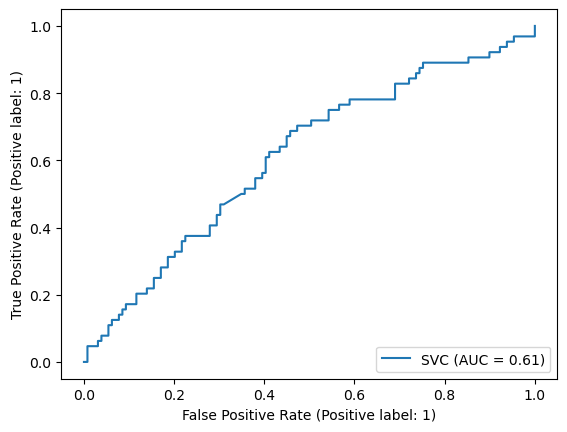

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828


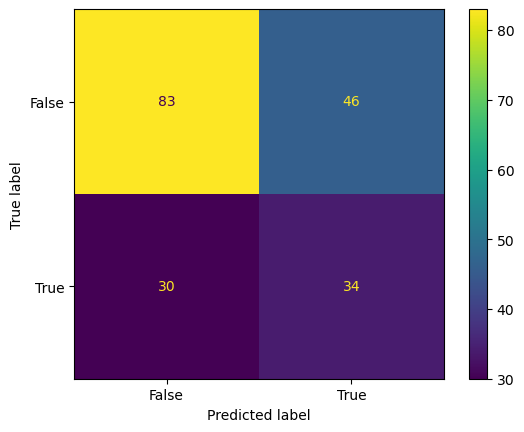

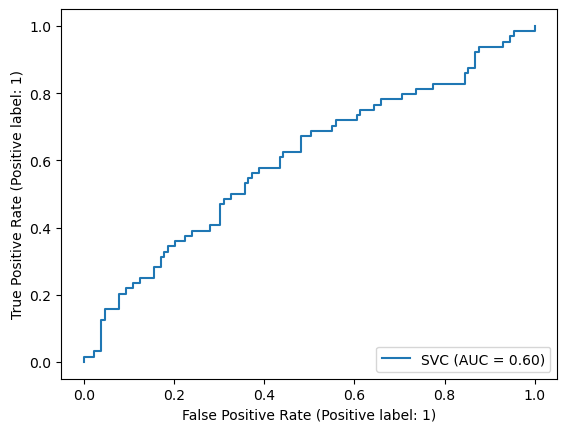

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744


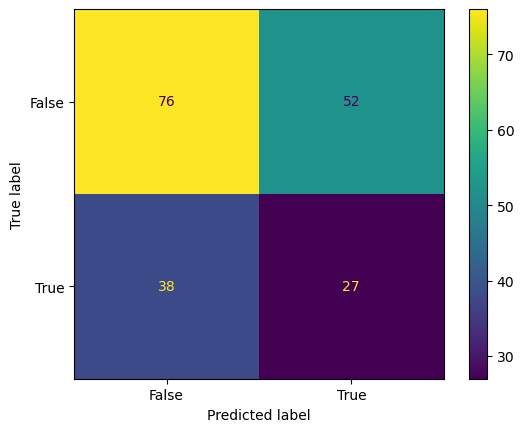

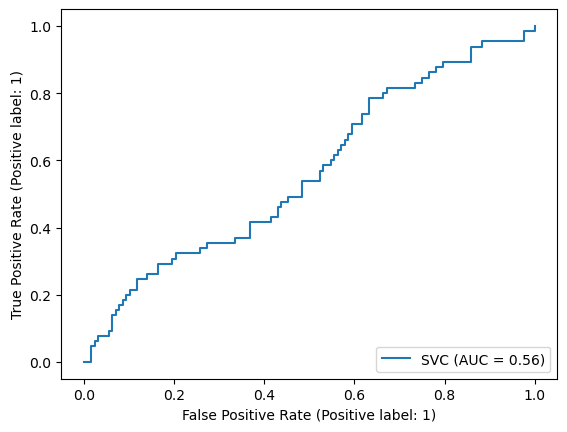

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063


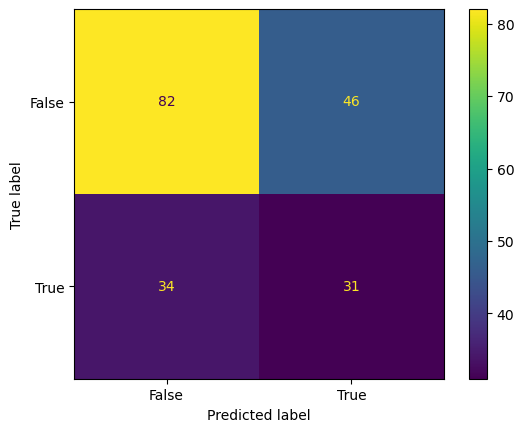

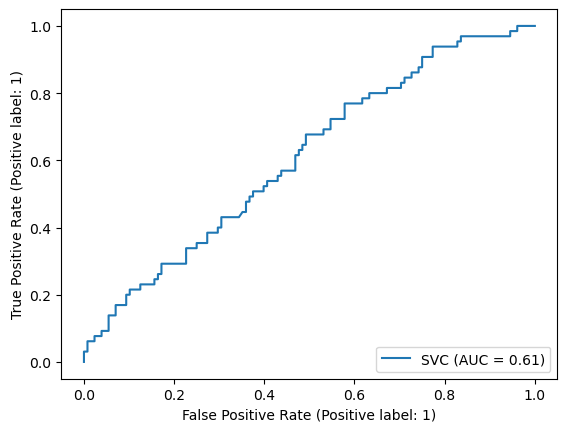

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063
5  0.585492   0.402597            0.476923     0.640625  0.608293


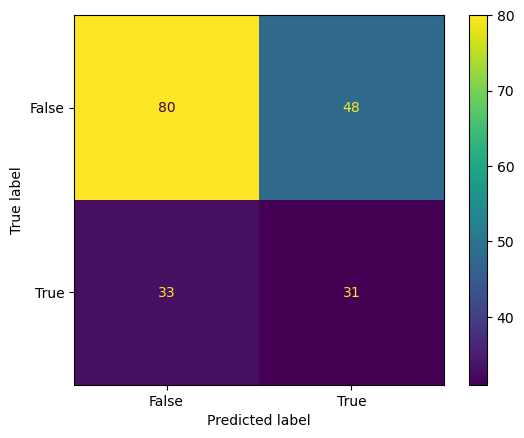

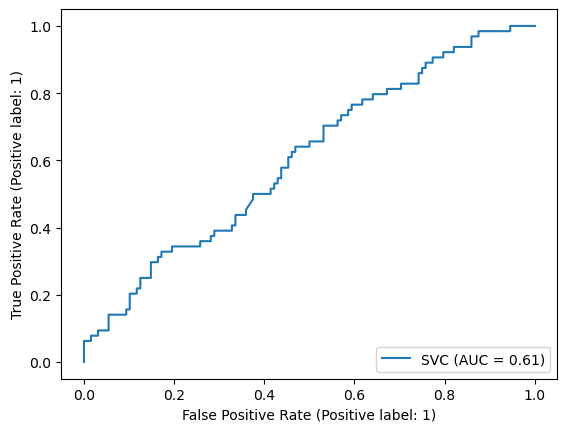

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063
5  0.585492   0.402597            0.476923     0.640625  0.608293
6  0.578125   0.392405            0.484375     0.625000  0.606445


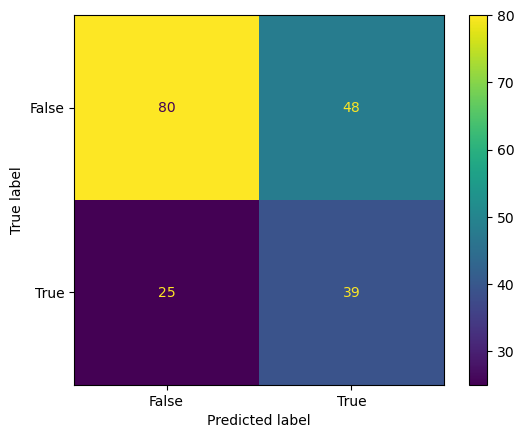

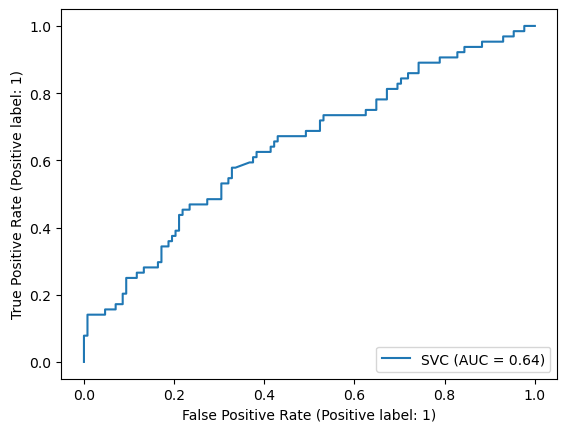

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063
5  0.585492   0.402597            0.476923     0.640625  0.608293
6  0.578125   0.392405            0.484375     0.625000  0.606445
7  0.619792   0.448276            0.609375     0.625000  0.642700


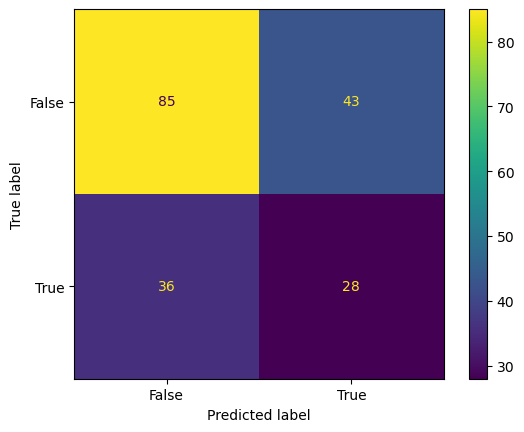

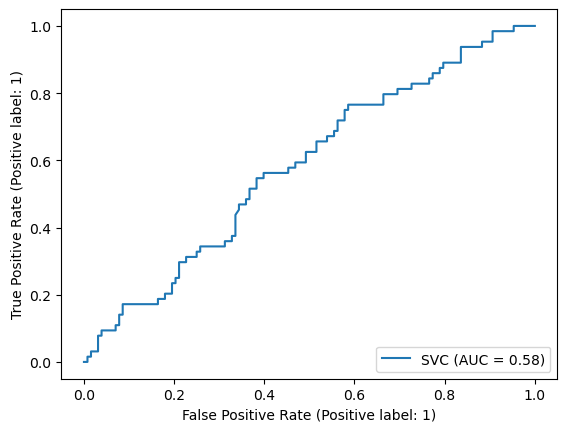

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063
5  0.585492   0.402597            0.476923     0.640625  0.608293
6  0.578125   0.392405            0.484375     0.625000  0.606445
7  0.619792   0.448276            0.609375     0.625000  0.642700
8  0.588542   0.394366            0.437500     0.664062  0.582520


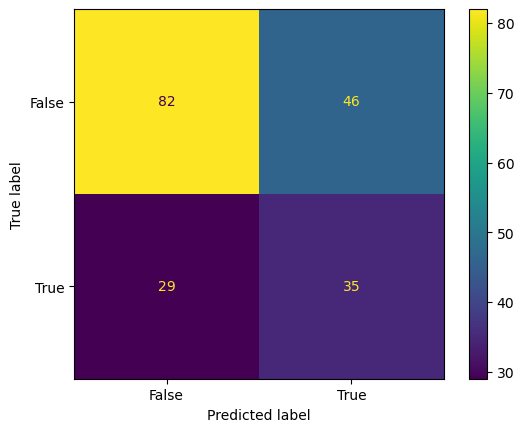

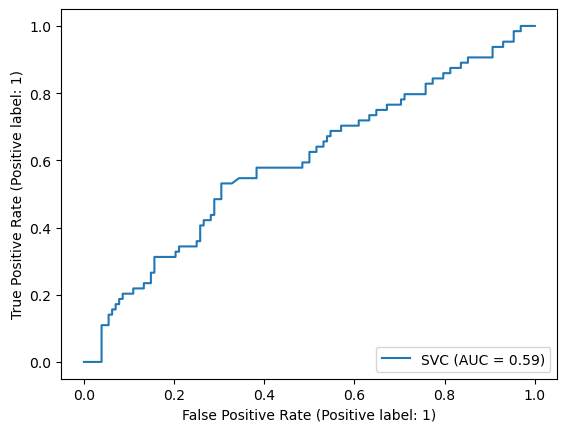

   Accuracy  Precision  Sensitivity_recall  Specificity       AUC
0  0.626943   0.439394            0.453125     0.713178  0.580063
1  0.637306   0.459459            0.531250     0.689922  0.623183
2  0.616580   0.428571            0.468750     0.689922  0.610828
3  0.606218   0.425000            0.531250     0.643411  0.601744
4  0.533679   0.341772            0.415385     0.593750  0.564063
5  0.585492   0.402597            0.476923     0.640625  0.608293
6  0.578125   0.392405            0.484375     0.625000  0.606445
7  0.619792   0.448276            0.609375     0.625000  0.642700
8  0.588542   0.394366            0.437500     0.664062  0.582520
9  0.609375   0.432099            0.546875     0.640625  0.595337


In [14]:
# Inisialisasi objek SMOTE
smote = SMOTE(random_state=42)

# Inisialisasi objek stratified k-fold dengan inisial skf
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan scaling pada data
scaler = StandardScaler()

results=[]

# Inisialisasi objek SVM
pipe = SVC(kernel='rbf',  C=1.0, gamma='auto', probability=True)

# Loop untuk setiap fold
for train_index, test_index in skf.split(X, y):
    
    # Memisahkan data untuk training dan testing
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    # Melakukan oversampling pada data training dengan SMOTE
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    X_train_res = scaler.fit_transform(X_train_res)
    X_test = scaler.transform(X_test)
    
    # Melakukan training pada model SVM
    pipe.fit(X_train_res, y_train_res)
    
    # Melakukan prediksi pada data testing
    y_pred = pipe.predict(X_test)
    
    # Hitung Probabilitas
    y_prob = pipe.decision_function(X_test)
    
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    # print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

    # print(classification_report(y_test, y_pred))
    plot_roc_curve(pipe, X_test, y_test)
    plt.show()

    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob)

    # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})

    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

# Evaluasi model menggunakan *Confusion Matrix* dan *AUC*

In [ ]:
#     # Confusion Matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

#     cm_display.plot()
#     plt.show()
     
#     Accuracy = metrics.accuracy_score(y_test, y_pred)
#     Precision = metrics.precision_score(y_test, y_pred)
#     Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#     Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#     print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity})
    
# #     print(classification_report(y_test, y_pred))
#     plot_roc_curve(pipe, X_test, y_test)
#     plt.show()
    
#     # AUC (y_prob[:,1] khusus untuk random forest dan knn)
#     auc = roc_auc_score(y_test, y_prob)
#     print('AUC:', auc)

# Klasifikasi menggunakan *Random Forest* (Opsional)

In [ ]:
# inisialisasi model Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# cross-validation dengan StratifiedKFold 10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# inisialisasi scalar
sc = StandardScaler()

# inisialisasi pipeline dengan random forest dan scalar
pipe = make_pipeline(sc, rfc)

# inisialisasi list untuk menampung hasil skor dari setiap fold
scores = []
results = []

# loop untuk setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # training model
    pipe.fit(X_train, y_train)
    
    # scoring model
    score = pipe.score(X_test, y_test)
    scores.append(score)

    # Melakukan prediksi pada data testing
    y_pred = pipe.predict(X_test)
    
    # Hitung Probabilitas
    y_prob =pipe.predict_proba(X_test)

    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
     
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
    
#     print(classification_report(y_test, y_pred))
    plot_roc_curve(pipe, X_test, y_test)
    plt.show()
    
    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob[:,1])
    
     # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

# Klasifikasi menggunakan *K-Nearest Neighbor* (Opsional)

In [ ]:
# inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# cross-validation dengan StratifiedKFold 10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# inisialisasi scalar
sc = StandardScaler()

# inisialisasi pipeline dengan KNN dan scalar
pipe = make_pipeline(sc, knn)

# inisialisasi list untuk menampung hasil skor dari setiap fold
scores = []

# loop untuk setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # training model
    pipe.fit(X_train, y_train)
    
    # scoring model
    score = pipe.score(X_test, y_test)
    scores.append(score)

    # Melakukan prediksi pada data testing
    y_pred = pipe.predict(X_test)
    
    # Hitung Probabilitas
    y_prob =pipe.predict_proba(X_test)

# Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
     
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Sensitivity_recall = metrics.recall_score(y_test, y_pred)
    Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
    
#     print(classification_report(y_test, y_pred))
    plot_roc_curve(pipe, X_test, y_test)
    plt.show()
    
    # AUC (y_prob[:,1] khusus untuk random forest dan knn)
    auc = roc_auc_score(y_test, y_prob[:,1])
    
     # Simpan hasil ke dalam list
    results.append({'Accuracy': Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity, 'AUC':auc})
    
    # Buat dataframe dari hasil
    df = pd.DataFrame(results)

    # Print dataframe
    print(df)

# Klasifikasi menggunakan *Decision Tree* (Opsional)

In [ ]:
# inisialisasi model Decision Tree
dtc = DecisionTreeClassifier(random_state=42)

# cross-validation dengan StratifiedKFold 10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# inisialisasi scalar
sc = StandardScaler()

# inisialisasi pipeline dengan decision tree dan scalar
pipe = make_pipeline(sc, dtc)

# training model dengan cross-validation
scores = cross_val_score(pipe, X, y, cv=cv)

y_pred = cross_val_predict(pipe, X, y, cv=cv)